# American Census

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, KFold

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"

## Load data

In [3]:
# Load train data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Load test data
X_test = pd.read_csv("X_test.csv")

# TODO


## Data exploration
1. What are the features and target variables of the dataset?
2. What is the right performance metric to use for this dataset? (Explain)
3. Algorithmic bias: should we use race and sex features in the machine learning algorithms? Explain the arguments.

### Question 1
#### Income - target column

In [4]:
# 
X_train.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,30,9.0,40,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,77,10.0,6,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
2,44,12.0,50,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,53,10.0,50,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,41,10.0,40,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States


In [5]:
y_train.head()

,salary
0,0
1,0
2,0
3,1
4,1


c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    12360
1     3920
Name: salary, dtype: int64

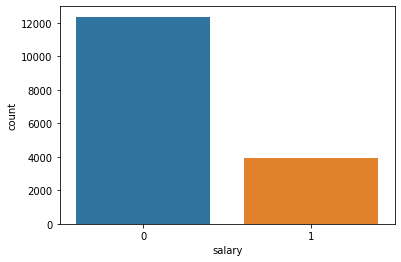

In [6]:
# TODO
# 
sns.countplot(y_train.salary)
y_train['salary'].value_counts()
# There is a high imbalance in the output classes.

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

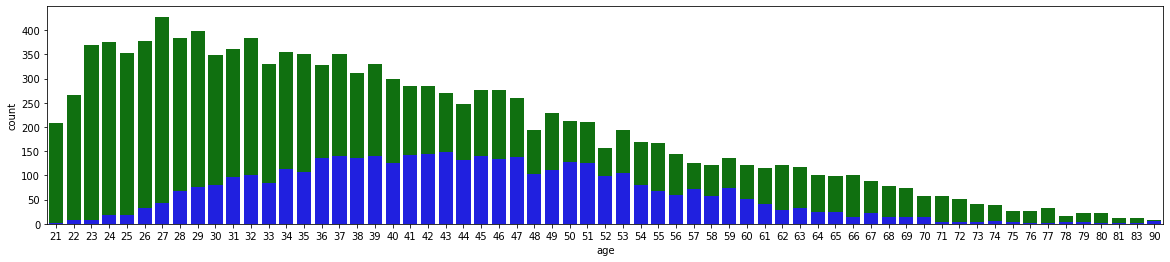

In [7]:
dims = (20,4)
fig, ax = pyplot.subplots(figsize=dims)
sns.countplot(X_train[y_train.salary == 0].age,color='green')
sns.countplot(X_train[y_train.salary == 1].age,color='blue')


c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='count'>

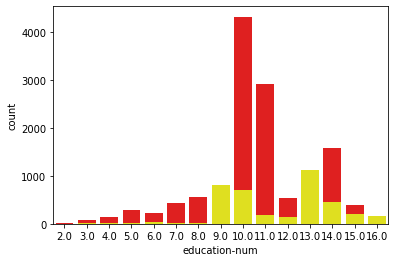

In [8]:
sns.countplot(X_train['education-num'][y_train.salary == 0],color='red')
sns.countplot(X_train['education-num'][y_train.salary == 1],color='yellow')

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

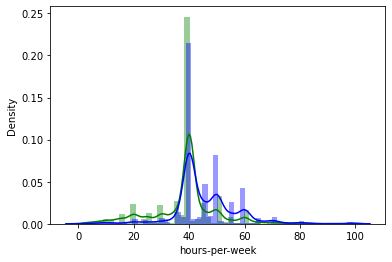

In [9]:
sns.distplot(X_train['hours-per-week'][y_train.salary == 0],color='green')
sns.distplot(X_train['hours-per-week'][y_train.salary == 1],color='blue')

In [10]:
X_train['native-country'].value_counts()

 United-States                 14598
 Mexico                          311
 Philippines                      85
 Canada                           67
 Germany                          66
 Puerto-Rico                      63
 El-Salvador                      58
 India                            57
 Cuba                             44
 Jamaica                          43
 England                          43
 South                            41
 China                            38
 Poland                           35
 Japan                            32
 Vietnam                          31
 Italy                            30
 Columbia                         29
 Guatemala                        28
 Iran                             27
 Dominican-Republic               26
 Portugal                         21
 Nicaragua                        21
 Taiwan                           21
 Haiti                            16
 Greece                           15
 Peru                             15
 

In [11]:
X_train['workclass'].value_counts()

 Private             11352
 Self-emp-not-inc     1263
 Local-gov            1063
 State-gov             628
 Self-emp-inc          574
 Federal-gov           453
 Without-pay             8
 Never-worked            3
Name: workclass, dtype: int64

In [12]:
X_train['education-num'].value_counts()

9.0     5132
10.0    3607
13.0    2683
14.0     833
11.0     712
7.0      594
12.0     524
6.0      463
4.0      300
15.0     270
5.0      247
8.0      205
16.0     204
3.0      160
2.0       80
1.0       26
Name: education-num, dtype: int64

In [13]:
X_train['marital-status'].value_counts()

 Married-civ-spouse       7464
 Never-married            5349
 Divorced                 2208
 Separated                 510
 Widowed                   500
 Married-spouse-absent     233
 Married-AF-spouse          16
Name: marital-status, dtype: int64

In [14]:
X_train['relationship'].value_counts()

 Husband           6545
 Not-in-family     4192
 Own-child         2538
 Unmarried         1708
 Wife               806
 Other-relative     491
Name: relationship, dtype: int64

### Question 2

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

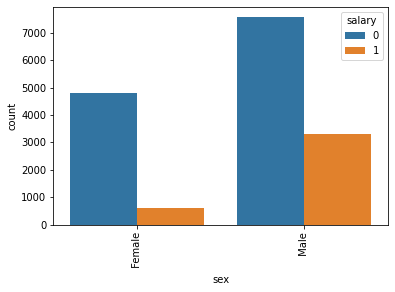

In [15]:
plt.xticks(rotation=90)
sns.countplot(X_train['sex'],hue=y_train['salary'])

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

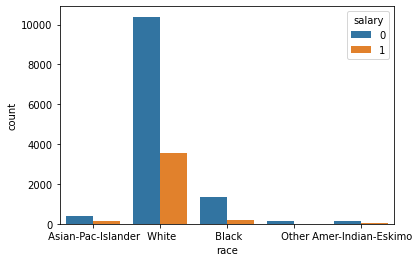

In [16]:
sns.countplot(X_train['race'],hue=y_train['salary'])

## Data preperation

### Question 1
This dataset hasn’t been cleaned, yet. Do this by finding all the missing values
and handling them. How did you handle these missing values? Clearly explain which
values were missing and how you handled them. Use no more than 100 words.

In [17]:
# Check for NaN values in the training dataset
X_train.isnull().sum()

age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
race                 0
sex                  0
native-country     300
dtype: int64

In [18]:
# TODO
## Helpers
def transformer(X):
    """
    Replace NaN values with the most repeated values in case of categorical data.
    Replace NaN values with mean value in case of numerical data.
    """
    for i,j in enumerate(X):
        if X[j].isnull().sum() > 0 and X[j].dtype == np.dtype('O'):
            X[j].fillna(X[j].mode()[0],inplace=True)
        elif X[j].isnull().sum() > 0:
            X[j].fillna(X[j].mean(),inplace=True)
    return X

In [19]:
x_train = transformer(X_train)
x_test = transformer(X_test)
# Check if the NaN values are removed
x_train.isnull().sum()
x_test.isnull().sum()

age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [20]:
x_test

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,74,10.0,40,Self-emp-inc,Some-college,Widowed,Exec-managerial,Unmarried,White,Male,United-States
1,17,8.0,15,Private,12th,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
2,60,10.0,32,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Other,Male,United-States
3,62,9.0,42,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,White,Female,United-States
4,52,10.0,65,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...
14742,30,12.0,50,Private,Assoc-acdm,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
14743,27,12.0,40,Private,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Male,United-States
14744,39,9.0,40,State-gov,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,United-States
14745,36,9.0,45,Local-gov,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [21]:
# Check object list
objlist = x_train.select_dtypes(include='object').columns
objlist

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [22]:
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Never-married','Single')
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Divorced','Single')
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Separated','Single')
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Widowed','Single')
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Married-spouse-absent','Single')
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Married-AF-spouse','Single')
x_train['marital-status'] = x_train['marital-status'].str.replace(r'Married-civ-spouse','Married')

In [23]:
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Never-married','Single')
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Divorced','Single')
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Separated','Single')
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Widowed','Single')
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Married-spouse-absent','Single')
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Married-AF-spouse','Single')
x_test['marital-status'] = x_test['marital-status'].str.replace(r'Married-civ-spouse','Married')

### Question 2

In [24]:
# TODO
#Encode categorical variables
categories = ['workclass',   'occupation',
        'race', 'native-country','education', 'marital-status',
       'relationship', 'sex']

for feature in categories:
    le = preprocessing.LabelEncoder()
    x_train[feature] = le.fit_transform(x_train[feature])
    x_test[feature] = le.fit_transform(x_test[feature])

#Feature Scaling
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)


In [25]:
test_scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled_test = pd.DataFrame(test_scaler.transform(x_test),columns=x_test.columns)

### Question 3

<AxesSubplot:>

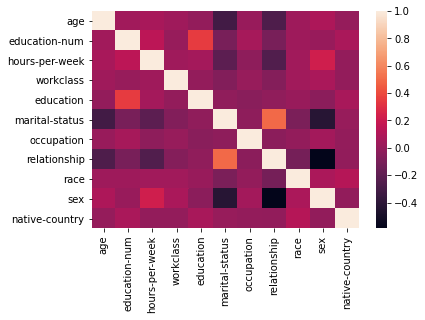

In [26]:
# TODO
sns.heatmap(x_scaled.corr())

In [27]:
# Drop the columns relationship and education as they have correlating values compared to other features
x_scaled.drop(columns=['relationship', 'education','race','sex'],inplace=True)
x_scaled_test.drop(columns=['relationship', 'education','race','sex'],inplace=True)

## Experiments

### Question 1

In [28]:
# TODO
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_scaled,y_train, test_size = 0.4)
# Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

Ytest = np.array(Ytest)

### Question 2

In [29]:
random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    "DummyClassifier": DummyClassifier(strategy="most_frequent"),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C=10, kernel="poly", random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, C=10)
}
names = []
results = []
for name, model in models.items():
    model.fit(Xtrain,Ytrain.ravel())
    prediction = model.predict(Xtest)
    f1_score_value = f1_score(Ytest.ravel(), prediction, average="weighted")
    accuracy = accuracy_score(Ytest.ravel(), prediction)
    confusion_matrix(Ytest.ravel(), prediction)
    results.append(f1_score_value)
    names.append(name)
    print(name)
    print("- accuracy_score", accuracy)
    print("- f1_score", f1_score_value)


GaussianNB
- accuracy_score 0.8103501228501229
- f1_score 0.8116771981047121
DummyClassifier
- accuracy_score 0.7581388206388207
- f1_score 0.6538442409806721
DecisionTreeClassifier
- accuracy_score 0.7882371007371007
- f1_score 0.7810988656485252
KNeighborsClassifier
- accuracy_score 0.7943796068796068
- f1_score 0.7914165076324473
SVM
- accuracy_score 0.8230958230958231
- f1_score 0.8078355206217681
LogisticRegression
- accuracy_score 0.8161855036855037
- f1_score 0.8075309707424664


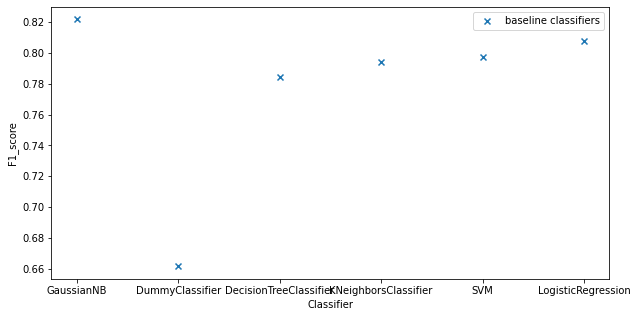

In [49]:
# Plotting the results of baseline classifiers
plt.figure(figsize=(10,5))
plt.scatter(names,results,marker="x",label="baseline classifiers")
plt.xlabel('Classifier')
plt.ylabel('F1_score')
plt.legend()
plt.show()

In [30]:
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)

    return scores["test_score"]

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

n_splits = 10

scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(true_target, prediction, average="weighted"))
scoring_method_acc = make_scorer(lambda prediction, true_target: accuracy_score(true_target, prediction))

for name, model in models.items():
    print(name)
    metrics_f1 = k_fold_fit_and_evaluate(x_scaled, y_train, model, scoring_method_f1, n_splits=n_splits)
    # START ANSWER
    metrics_acc = k_fold_fit_and_evaluate(x_scaled, y_train, model, scoring_method_acc, n_splits=n_splits)

    mean_f1 = np.mean(metrics_f1)
    std_f1 = np.std(metrics_f1)
    mean_acc = np.mean(metrics_acc)
    std_acc = np.std(metrics_acc)
    print("- mean F1", round(mean_f1,3))
    print("- std F1", round(std_f1,4))
    print("- mean Accuracy Score", round(mean_acc,3))
    print("- std Accuracy Score", round(std_acc,4))

GaussianNB
- mean F1 0.815
- std F1 0.0125
- mean Accuracy Score 0.816
- std Accuracy Score 0.0129
DummyClassifier
- mean F1 0.863
- std F1 0.0064
- mean Accuracy Score 0.759
- std Accuracy Score 0.0099
DecisionTreeClassifier
- mean F1 0.801
- std F1 0.0075
- mean Accuracy Score 0.793
- std Accuracy Score 0.0087
KNeighborsClassifier
- mean F1 0.801
- std F1 0.0098
- mean Accuracy Score 0.799
- std Accuracy Score 0.0097
SVM
- mean F1 0.837
- std F1 0.0076
- mean Accuracy Score 0.82
- std Accuracy Score 0.009
LogisticRegression
- mean F1 0.827
- std F1 0.0092
- mean Accuracy Score 0.817
- std Accuracy Score 0.0099


### Question 3

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda prediction, true_target: f1_score(true_target, prediction, average="weighted"))

model_parameters = {
    "GaussianNB": {

    },
    "DummyClassifier": {

    },
    "DecisionTreeClassifier": {
        'random_state': [random_state],
        'max_depth': [None, 2, 5, 10]
    },
    "LogisticRegression": {
        'penalty' : ['l1','l2','elasticnet', 'none'],
        'C' : [10,1000,3000,4000],
        'solver' : ['lbfgs','newton-cg','liblinear', 'sag'],
        'max_iter' : [100,1000,2500,5000],
        'random_state' : [random_state]
    },
    "SVM": {
        'C' : [11,12,13,14],
        'kernel' : ['rbf','linear','poly'],
        'random_state' : [random_state]
    },
    "KNeighborsClassifier" : {
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights' : ['uniform', 'distance']
    }
}

for model_name, parameters in model_parameters.items():
    model = models[model_name]

    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=True, scoring=scoring_method).fit(Xtrain, Ytrain.ravel())

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


GaussianNB
- best_score = 0.8172253686574532
best paramters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DummyClassifier
- best_score = 0.8635771719301687
best paramters:
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DecisionTreeClassifier
- best_score = 0.8346344789075552
best paramters:
- max_depth 2
- random_state 42
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


LogisticRegression
- best_score = 0.8271721439761208
best paramters:
- C 10
- max_iter 100
- penalty l1
- random_state 42
- solver liblinear
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


SVM
- best_score = 0.8369267257333648
best paramters:
- C 11
- kernel rbf
- random_state 42
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s


KNeighborsClassifier
- best_score = 0.8317875820597319
best paramters:
- n_neighbors 10
- weights uniform


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


### Question 4

In [52]:
#TODO
# Tuned models
random_state = 42

tuned_models = {
    "GaussianNB": GaussianNB(),
    "DummyClassifier": DummyClassifier(strategy="most_frequent"),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=10, weights="uniform"),
    "SVM": SVC(C=11, kernel="rbf", random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, C=10,max_iter=100,
                                             penalty='l1',solver='liblinear')
}
tuned_names = []
tuned_results = []
for name, model in tuned_models.items():
    model.fit(Xtrain,Ytrain.ravel())
    prediction = model.predict(Xtest)
    f1_score_value = f1_score(Ytest.ravel(), prediction, average="weighted")
    accuracy = accuracy_score(Ytest.ravel(), prediction)
    tuned_results.append(f1_score_value)
    tuned_names.append(name)
    print(name)
    print("- accuracy_score", accuracy)
    print("- f1_score", f1_score_value)

GaussianNB
- accuracy_score 0.8103501228501229
- f1_score 0.8116771981047121
DummyClassifier
- accuracy_score 0.7581388206388207
- f1_score 0.6538442409806721
DecisionTreeClassifier
- accuracy_score 0.8167997542997543
- f1_score 0.7986032552352239
KNeighborsClassifier
- accuracy_score 0.8195638820638821
- f1_score 0.8113473354149381
SVM
- accuracy_score 0.8303132678132679
- f1_score 0.8223765818951388
LogisticRegression
- accuracy_score 0.8161855036855037
- f1_score 0.8075309707424664


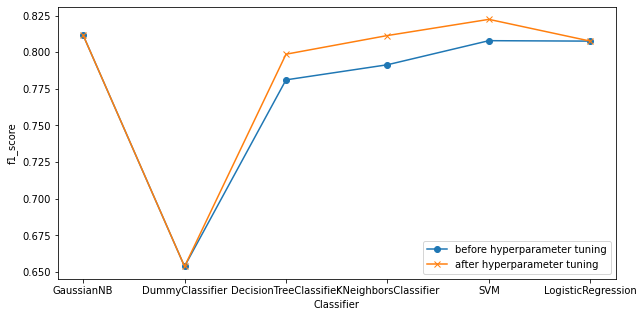

In [54]:
# results
plt.figure(figsize=(10,5))
plt.plot(names,results, marker="o",label="before hyperparameter tuning")
plt.plot(names,tuned_results,marker="x",label="after hyperparameter tuning")
plt.xlabel('Classifier')
plt.ylabel('f1_score')
plt.legend()
plt.show()

### Question 5

In [55]:
#TODO
prediction = tuned_models['SVM'].predict(x_scaled_test) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP18_classes_problem_census.txt", index=False, header=False)